<a href="https://colab.research.google.com/github/raj-dandangi/ds_dandangi_raj-PrimeTradeAI-/blob/main/ds_assignment_notebook_1(Primetrade_aI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing nessery modules
import pandas as pd
import numpy as np
import gspread
from google.colab import auth

note : csv_files are imported from google drive (mounted)  , - no files are downloaded to my personal local computer

In [ ]:
# Authenticate to Google Drive
auth.authenticate_user()

# Authorize gspread
import google.auth
from google.colab import auth

# Authenticate with Google
auth.authenticate_user()

# Get the credentials
creds, _ = google.auth.default()

# Authorize gspread
gc = gspread.authorize(creds)

#importing sheets
sheet_name = 'historical_data'
sh = gc.open(sheet_name)

worksheet = sh.sheet1
data = worksheet.get_all_values()

df_historical_data = pd.DataFrame(data[1:], columns=data[0])
df_historical_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.34540448,8.95E+14,1.73E+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16,127.68,BUY,02-12-2024 22:50,986.5245955,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.0056,4.43E+14,1.73E+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.0504314,6.60E+14,1.73E+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.05004294,1.08E+15,1.73E+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.00305542,1.05E+15,1.73E+12


# EDA OR DIG(Description , instrospection and goal setting):

1.getting information about dataset

In [ ]:
df_historical_data.shape

(211224, 16)

In [ ]:
# Statistics information
df_historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Account           211224 non-null  object
 1   Coin              211224 non-null  object
 2   Execution Price   211224 non-null  object
 3   Size Tokens       211224 non-null  object
 4   Size USD          211224 non-null  object
 5   Side              211224 non-null  object
 6   Timestamp IST     211224 non-null  object
 7   Start Position    211224 non-null  object
 8   Direction         211224 non-null  object
 9   Closed PnL        211224 non-null  object
 10  Transaction Hash  211224 non-null  object
 11  Order ID          211224 non-null  object
 12  Crossed           211224 non-null  object
 13  Fee               211224 non-null  object
 14  Trade ID          211224 non-null  object
 15  Timestamp         211224 non-null  object
dtypes: object(16)
memory usage: 25.8+ MB


In [ ]:
df_historical_data.dtypes

,0
Account,object
Coin,object
Execution Price,object
Size Tokens,object
Size USD,object
Side,object
Timestamp IST,object
Start Position,object
Direction,object
Closed PnL,object


# finding null and missing values

In [ ]:
#finding missing values
df_historical_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
df_historical_data.value_counts()

Account                                     Coin  Execution Price  Size Tokens  Size USD  Side  Timestamp IST     Start Position  Direction    Closed PnL  Transaction Hash                                                    Order ID     Crossed  Fee       Trade ID  Timestamp
0xbee1707d6b44d4d52bfe19e41f8a828645437aab  SOL   232.46           86.04        20000.86  BUY   09-12-2024 13:22  97.72           Open Long    0           0xb16fccf939a93f5f0d090418ca6a8d0201160078960c712e1f6803c67c9f333f  53820113858  TRUE     5.000214  3.06E+13  1.73E+12     1
0x083384f897ee0f19899168e3b1bec365f52a9012  ETH   1570.1           0.0078       12.25     BUY   12-04-2025 12:21  -420.2293       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.001224  6.83E+14  1.74E+12     1
                                                                                                12-04-2025 12:22  -313.3401       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.001224  6.90E+14  1.74E+12     1
                                                                                                12-04-2025 12:31  -203.3632       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.001224  3.42E+14  1.74E+12     1
                                                                                                                  -311.9386       Close Short  5.658978    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.001224  9.78E+14  1.74E+12     1
                                                                                                                                                                                                                                                                                     ..
                                                                   0.0192       30.15     BUY   12-04-2025 12:31  -311.9308       Close Short  13.929792   0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.003014  5.19E+14  1.74E+12     1
                                                                   0.0161       25.28     BUY   12-04-2025 12:21  -420.2454       Close Short  11.680711   0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.002527  7.22E+14  1.74E+12     1
                                                                   0.016        25.12     BUY   12-04-2025 12:22  -313.3561       Close Short  11.60816    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.002512  6.44E+14  1.74E+12     1
                                                                   0.0152       23.87     BUY   12-04-2025 12:21  -420.2694       Close Short  11.027752   0xf943e4906e478c1362d2042162d60502010b005b28372585bd28180e0e760c0c  85971520603  FALSE    0.002386  4.90E+14  1.74E+12     1
                                                                   0.0088       13.82     BUY   12-04-2025 12:25  -311.9474       Close Short  6.384488    0x0000000000000000000000000000000000000000000000000000000000000000  85971520603  FALSE    0.001381  1.59E+13  1.74E+12     1
Name: count, Length: 211224, dtype: int64

In [ ]:
!pip install missingno

<Axes: >

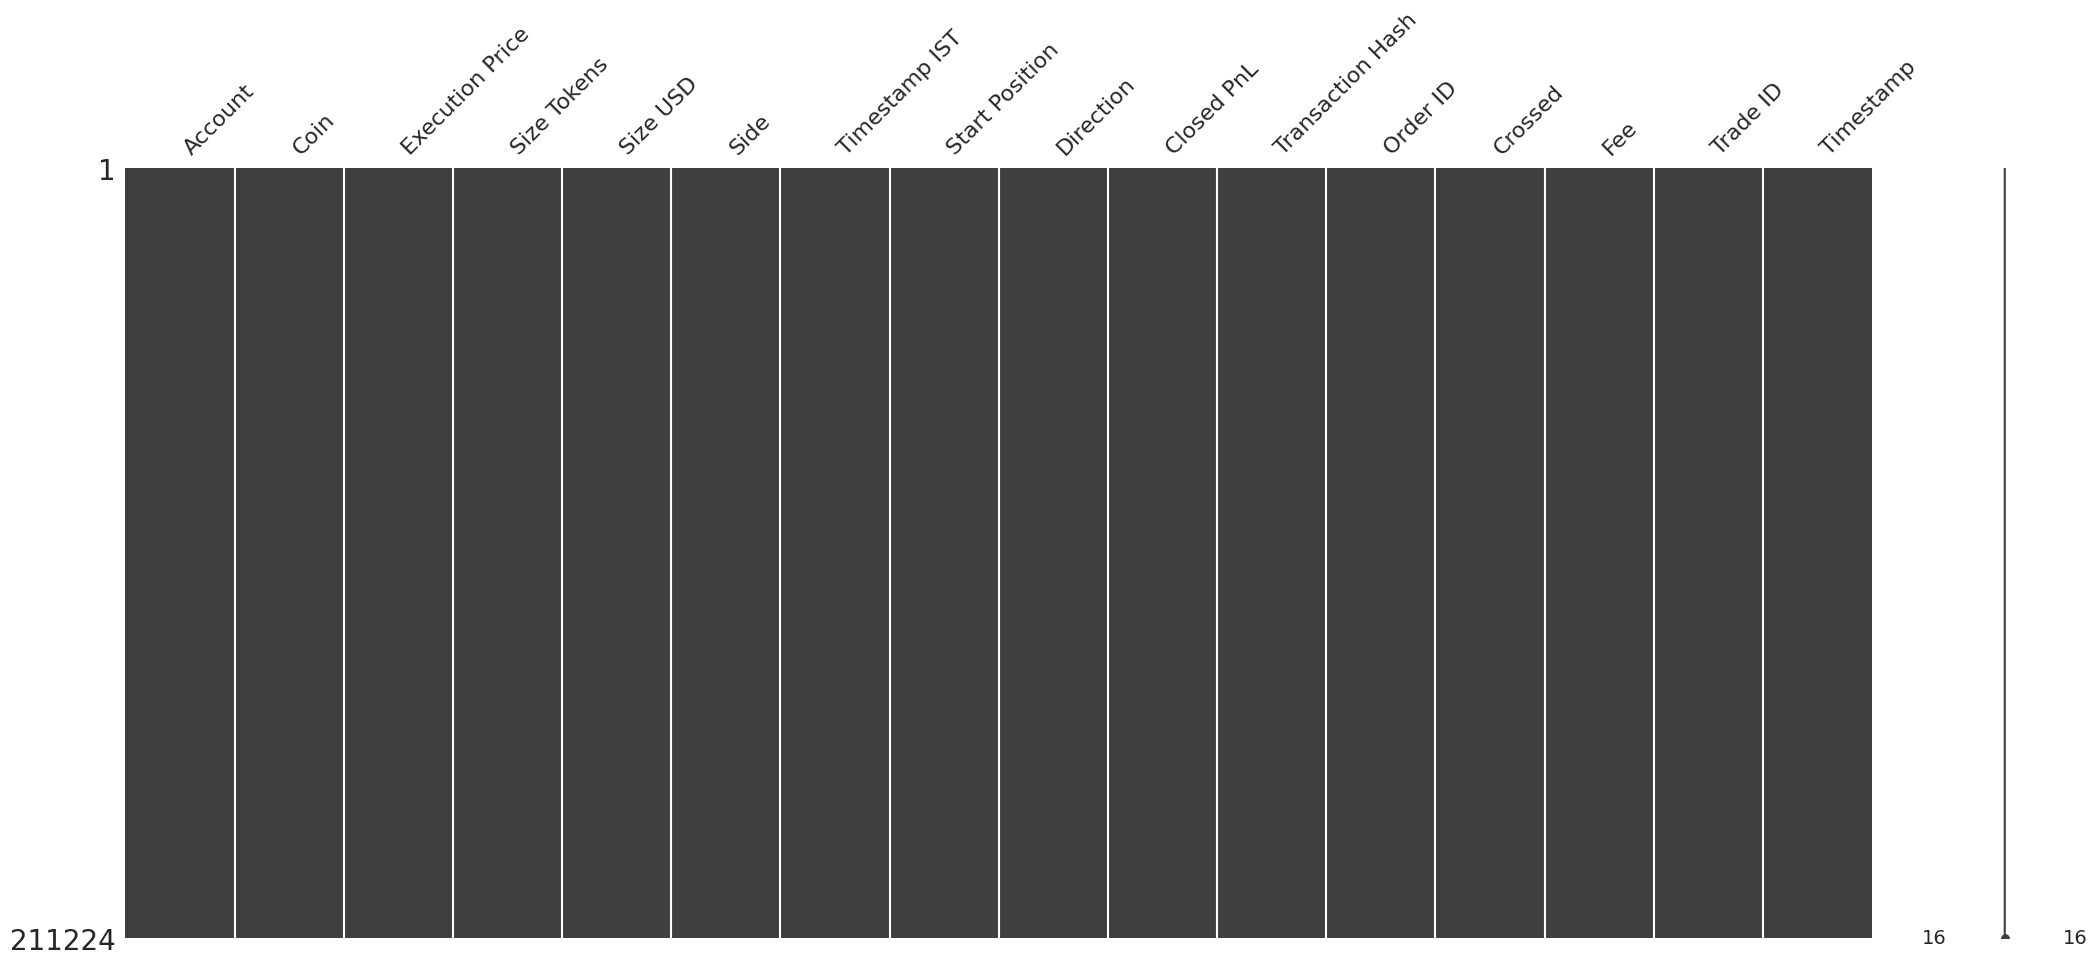

In [ ]:
import missingno as msno
msno.matrix(df_historical_data)

concusion : no null values found

# finding unique values

In [ ]:
df_historical_data.nunique()

,0
Account,32
Coin,246
Execution Price,60162
Size Tokens,59304
Size USD,118493
Side,2
Timestamp IST,27977
Start Position,196923
Direction,12
Closed PnL,90720


In [ ]:
for i in df_historical_data.columns:
  unique_vals = df_historical_data[i].unique()
  print(f"\n unique values in {i} : {unique_vals}")


 unique values in Account : ['0xae5eacaf9c6b9111fd53034a602c192a04e082ed'
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0'
 '0x513b8629fe877bb581bf244e326a047b249c4ff1'
 '0x083384f897ee0f19899168e3b1bec365f52a9012'
 '0x430f09841d65beb3f27765503d0f850b8bce7713'
 '0x8381e6d82f1affd39a336e143e081ef7620a3b7f'
 '0x4f93fead39b70a1824f981a54d4e55b278e9f760'
 '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4'
 '0x420ab45e0bd8863569a5efbb9c05d91f40624641'
 '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23'
 '0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd'
 '0x6d6a4b953f202f8df5bed40692e7fd865318264a'
 '0xbaaaf6571ab7d571043ff1e313a9609a10637864'
 '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb'
 '0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891'
 '0xa0feb3725a9335f49874d7cd8eaad6be45b27416'
 '0x8477e447846c758f5a675856001ea72298fd9cb5'
 '0x8170715b3b381dffb7062c0298972d4727a0a63b'
 '0x47add9a56df66b524d5e2c1993a43cde53b6ed85'
 '0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6'
 '0x28736f43f1e871e6aa8b1148d38d4994275d72c4'
 '0x3

# data cleaning

removing duplicates

In [ ]:
# removing duplicates
starting_rows = df_historical_data.shape[0]
print(f"Starting rows: {starting_rows}")
df_historical_data.drop_duplicates(inplace=True)
ending_rows = df_historical_data.shape[0]
print(f"Ending rows: {ending_rows}")

Starting rows: 211224
Ending rows: 211224



removing special charter

1. need to remove @ from coin
2. Timestamp IST
3. check timestamp and trade_id





In [ ]:
# removing @ from coin
df_historical_data['Coin'] = df_historical_data['Coin'].str.replace('@','TOKEN')

In [ ]:
#converting timestampist to date and time
df_historical_data['Timestamp IST'] = pd.to_datetime(df_historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [ ]:
df_historical_data.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.34540448,8.95E+14,1.73E+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.98,16,127.68,BUY,2024-12-02 22:50:00,986.5245955,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.0056,4.43E+14,1.73E+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,TRUE,0.0504314,6.60E+14,1.73E+12


converting data types <br>
finding numerical and float and date_time <br>columns and fixing data types
converting to catogorical for memory efficiency

In [ ]:
numerical_df_columns = df_historical_data.select_dtypes(include=[np.number]).columns
print(numerical_df_columns)

Index([], dtype='object')


In [ ]:
df_historical_data.dtypes

,0
Account,object
Coin,object
Execution Price,object
Size Tokens,object
Size USD,object
Side,object
Timestamp IST,datetime64[ns]
Start Position,object
Direction,object
Closed PnL,object


In [ ]:
number_col = []
date_time_col = []
other_dtypes_col = []
object_cols = df_historical_data.select_dtypes(include=['object']).columns

# finding numerical columns
for i in object_cols:
  temp_numeric =pd.to_numeric(df_historical_data[i], errors='coerce')
  if temp_numeric.isnull().sum() / len(df_historical_data) > 0.9:
    try:
      df_historical_data[i] = pd.to_datetime(df_historical_data[i])
      date_time_col.append(i)
    except Exception:
      other_dtypes_col.append(i)
  else:
    number_col.append(i)
print("\n -- numberical and date_time_columns -- ")
print(f"number_col : {number_col}")
print(f"date_time_col : {date_time_col}")
print(f"other_dtypes_col : {other_dtypes_col}")


/tmp/ipython-input-23-2681827055.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historical_data[i] = pd.to_datetime(df_historical_data[i])
/tmp/ipython-input-23-2681827055.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historical_data[i] = pd.to_datetime(df_historical_data[i])
/tmp/ipython-input-23-2681827055.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historical_data[i] = pd.to_datetime(df_historical_data[i])
/tmp/ipython-input-23-2681827055.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back t


 -- numberical and date_time_columns -- 
number_col : ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Order ID', 'Fee', 'Trade ID', 'Timestamp']
date_time_col : []
other_dtypes_col : ['Account', 'Coin', 'Side', 'Direction', 'Transaction Hash', 'Crossed']


In [ ]:
number_col = df_historical_data[['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Order ID', 'Fee', 'Trade ID', 'Timestamp']]
number_col.head(10)


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
0,7.9769,986.87,7872.16,0,0,52017706630,0.34540448,8.95E+14,1.73E+12
1,7.98,16,127.68,986.5245955,0,52017706630,0.0056,4.43E+14,1.73E+12
2,7.9855,144.09,1150.63,1002.518996,0,52017706630,0.0504314,6.60E+14,1.73E+12
3,7.9874,142.98,1142.04,1146.558564,0,52017706630,0.05004294,1.08E+15,1.73E+12
4,7.9894,8.73,69.75,1289.488521,0,52017706630,0.00305542,1.05E+15,1.73E+12
5,7.99,1.41,11.27,1298.215466,0,52017706630,0.00049349,7.33E+14,1.73E+12
6,7.9934,144.09,1151.77,1299.624972,0,52017706630,0.05043148,9.06E+14,1.73E+12
7,8,34,272,1443.664541,0,52017706630,0.0119,3.96E+14,1.73E+12
8,8,46,368,1477.652641,0,52017706630,0.0161,9.46E+14,1.73E+12
9,8,12.5,100,1523.636541,0,52017706630,0.004375,3.47E+13,1.73E+12


In [ ]:
string_col = df_historical_data[['Account', 'Coin', 'Side', 'Direction', 'Transaction Hash', 'Crossed']]
string_col.head()

,Account,Coin,Side,Direction,Transaction Hash,Crossed
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...,TRUE
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...,TRUE
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...,TRUE
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...,TRUE
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,BUY,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...,TRUE


In [ ]:
# converting decimnal data to float 64
folat_data = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL','Fee']

for i in folat_data:
  df_historical_data[i] = df_historical_data[i].astype(float)
  print(f"columns converted to float : {i}")
  print(df_historical_data[i].dtypes)

columns converted to float : Execution Price
float64
columns converted to float : Size Tokens
float64
columns converted to float : Size USD
float64
columns converted to float : Start Position
float64
columns converted to float : Closed PnL
float64
columns converted to float : Fee
float64


In [ ]:
#converting numerical data
int_col = ['Order ID']

for i in int_col:
  df_historical_data[i] = df_historical_data[i].astype(int)
  print(f"columns converted to int : {i}")
  print(df_historical_data[i].dtypes)

columns converted to int : Order ID
int64


In [ ]:
#converting boolen
bool_col = ['Crossed']
for i in bool_col:
  df_historical_data[i] = df_historical_data[i].astype(bool)
  print(f"columns converted to bool : {i}")

columns converted to bool : Crossed


In [ ]:
#converting into category dtype
cat_col = ['Account', 'Coin', 'Side', 'Direction']
for i in cat_col:
  df_historical_data[i] = df_historical_data[i].astype('category')
  print(f"columns coverted : {i}")

columns coverted : Account
columns coverted : Coin
columns coverted : Side
columns coverted : Direction


In [ ]:
df_historical_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.95E+14,1.73E+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.43E+14,1.73E+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.60E+14,1.73E+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.08E+15,1.73E+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.05E+15,1.73E+12


In [ ]:
df_historical_data.dtypes

,0
Account,category
Coin,category
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,category
Timestamp IST,datetime64[ns]
Start Position,float64
Direction,category
Closed PnL,float64


Fix errors or inconsistencies in the dataset

In [ ]:
# Investigate 'Trade ID' and 'Timestamp'
print("Unique values in 'Trade ID':")
print(df_historical_data['Trade ID'].unique())

print("\nUnique values in 'Timestamp':")
print(df_historical_data['Timestamp'].unique())

Unique values in 'Trade ID':
['8.95E+14' '4.43E+14' '6.60E+14' ... '2.40E+12' '3.51E+11' '6.54E+12']

Unique values in 'Timestamp':
['1.73E+12' '1.74E+12' '1.75E+12' '1.71E+12' '1.72E+12' '1.70E+12'
 '1.68E+12']


In [ ]:
# Examine descriptive statistics for float columns
float_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
display(df_historical_data[float_cols].describe())

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593


In [ ]:
# Convert 'Trade ID' and 'Timestamp' to numeric
df_historical_data['Trade ID'] = pd.to_numeric(df_historical_data['Trade ID'])
df_historical_data['Timestamp'] = pd.to_numeric(df_historical_data['Timestamp'])

display(df_historical_data[['Trade ID', 'Timestamp']].head())

,Trade ID,Timestamp
0,8.950000e+14,1.730000e+12
1,4.430000e+14,1.730000e+12
2,6.600000e+14,1.730000e+12
3,1.080000e+15,1.730000e+12
4,1.050000e+15,1.730000e+12


In [ ]:
df_historical_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [ ]:
df_historical_data['Fixed_Trade_ID'] = df_historical_data['Trade ID'].astype(str)
# Identify dust trades (Trade ID = 0 or Size USD < 1)
dust_mask = (df_historical_data['Trade ID'] == 0) | (df_historical_data['Size USD'] < 1)
df_historical_data.loc[dust_mask, 'Fixed_Trade_ID'] = 'DUST-' + pd.to_datetime(df_historical_data['Timestamp'], unit='ms').dt.strftime('%Y%m%d%H%M%S')

In [ ]:
df_historical_data['Fixed_Trade_ID'].describe()

,Fixed_Trade_ID
count,211224
unique,2816
top,1120000000000000.0
freq,1941


In [ ]:
df_historical_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Fixed_Trade_ID
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,895000000000000.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,443000000000000.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,660000000000000.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1080000000000000.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1050000000000000.0
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,733000000000000.0
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,906000000000000.0
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,396000000000000.0
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,946000000000000.0
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,34700000000000.0


In [ ]:
duplicates = df_historical_data[df_historical_data.duplicated(subset=['Fixed_Trade_ID'], keep=False)]
if not duplicates.empty:
    # Append a counter to duplicates
    df_historical_data['Fixed_Trade_ID'] = df_historical_data['Fixed_Trade_ID'] + '-' + df_historical_data.groupby('Fixed_Trade_ID').cumcount().astype(str)

In [ ]:
df_historical_data.count()

,0
Account,211224
Coin,211224
Execution Price,211224
Size Tokens,211224
Size USD,211224
Side,211224
Timestamp IST,211224
Start Position,211224
Direction,211224
Closed PnL,211224


# explanation of the below code (Fee Discrepancy Validation)
1.Compares the actual fee you paid vs. what usershould have paid (based on trade size & expected rate).
2.code explanation :

> 2.1expected_fee_rate = 'free rate in usd because size is in USD'

> 2.2'Fee_Discrepancy':The dollar difference between the fee user actually paid and the fee you expected to pay.<br>
> 'Discrepancy_Percentage'	How big that difference is relative to the expected fee, expressed as a percentage.<br>
> 2.3 Flags trades where the difference is unusually large



In [ ]:
#Fee Discrepancy Validation
EXPECTED_FEE_RATE = 0.00035

df_historical_data['Expected_Fee'] = df_historical_data['Size USD'] * EXPECTED_FEE_RATE

# Calculate discrepancy
df_historical_data['Fee_Discrepancy'] = abs(df_historical_data['Fee'] - df_historical_data['Expected_Fee'])
df_historical_data['Discrepancy_Percent'] = (df_historical_data['Fee_Discrepancy'] / df_historical_data['Expected_Fee']) * 100

# Flag discrepancies >1%
flagged_fees = df_historical_data[df_historical_data['Discrepancy_Percent'] > 1]

# Display flagged rows
print("Flagged Fee Discrepancies:")
print(flagged_fees[['Fixed_Trade_ID', 'Coin', 'Size USD', 'Fee', 'Expected_Fee', 'Discrepancy_Percent']])

Flagged Fee Discrepancies:
               Fixed_Trade_ID      Coin  Size USD       Fee  Expected_Fee  \
0         895000000000000.0-0  TOKEN107   7872.16  0.345404      2.755256   
1         443000000000000.0-0  TOKEN107    127.68  0.005600      0.044688   
2         660000000000000.0-0  TOKEN107   1150.63  0.050431      0.402721   
3        1080000000000000.0-0  TOKEN107   1142.04  0.050043      0.399714   
4        1050000000000000.0-0  TOKEN107     69.75  0.003055      0.024413   
...                       ...       ...       ...       ...           ...   
211219  199000000000000.0-202  FARTCOIN    420.80  0.042080      0.147280   
211220  926000000000000.0-191  FARTCOIN   2338.63  0.233863      0.818520   
211221  693000000000000.0-205  FARTCOIN    466.16  0.046616      0.163156   
211222  418000000000000.0-183  FARTCOIN   3963.38  0.396337      1.387183   
211223  327000000000000.0-196  FARTCOIN   1119.83  0.111982      0.391940   

        Discrepancy_Percent  
0                 

In [ ]:
df_historical_data['timestampfix'] = pd.to_datetime(df_historical_data['Timestamp'],unit = 'ms',errors='coerce')

In [ ]:
df_historical_data['timestampfix'].head(10)

,timestampfix
0,2024-10-27 03:33:20
1,2024-10-27 03:33:20
2,2024-10-27 03:33:20
3,2024-10-27 03:33:20
4,2024-10-27 03:33:20
5,2024-10-27 03:33:20
6,2024-10-27 03:33:20
7,2024-10-27 03:33:20
8,2024-10-27 03:33:20
9,2024-10-27 03:33:20


In [ ]:
df_historical_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Fixed_Trade_ID,Expected_Fee,Fee_Discrepancy,Discrepancy_Percent,timestampfix
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,895000000000000.0-0,2.755256,2.409852,87.463797,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,443000000000000.0-0,0.044688,0.039088,87.468672,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,660000000000000.0-0,0.402721,0.352289,87.477320,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1080000000000000.0-0,0.399714,0.349671,87.480313,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1050000000000000.0-0,0.024413,0.021357,87.484199,2024-10-27 03:33:20
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,733000000000000.0-0,0.003945,0.003451,87.489162,2024-10-27 03:33:20
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,906000000000000.0-0,0.403119,0.352688,87.489695,2024-10-27 03:33:20
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,396000000000000.0-0,0.095200,0.083300,87.500000,2024-10-27 03:33:20
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,946000000000000.0-0,0.128800,0.112700,87.500000,2024-10-27 03:33:20
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,34700000000000.0-0,0.035000,0.030625,87.500000,2024-10-27 03:33:20


# Explore Data Characteristics

Perform univariate analysis :  most useful columns from datset and performing  basic stats, and visualise

In [ ]:
df_historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account              211224 non-null  category      
 1   Coin                 211224 non-null  category      
 2   Execution Price      211224 non-null  float64       
 3   Size Tokens          211224 non-null  float64       
 4   Size USD             211224 non-null  float64       
 5   Side                 211224 non-null  category      
 6   Timestamp IST        211224 non-null  datetime64[ns]
 7   Start Position       211224 non-null  float64       
 8   Direction            211224 non-null  category      
 9   Closed PnL           211224 non-null  float64       
 10  Transaction Hash     211224 non-null  object        
 11  Order ID             211224 non-null  int64         
 12  Crossed              211224 non-null  bool          
 13  Fee           

In [ ]:
df_historical_data.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,Expected_Fee,Fee_Discrepancy,Discrepancy_Percent,timestampfix
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211181.000000,211224
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,1.973808,0.839460,82.268927,2025-01-24 18:44:50.421542912
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,0.000000,0.000000,0.000000,2023-03-28 10:40:00
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,0.067826,0.000002,0.014234,2025-02-19 21:20:00
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,0.208966,0.037294,28.571444,2025-02-19 21:20:00
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,0.720636,0.249911,72.583643,2025-02-19 21:20:00
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,1372.500752,1372.500752,409199.279633,2025-06-15 15:06:40
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,12.801298,8.968054,2714.183339,NaN


1. • Duplicate Trade IDs for the same Coin.
2. • Negative or extremely large Closed PnL on non-close fills.
3. • Fee_Discrepancy outliers (often caused by rebate tiers or VIP discounts).
4. • Timestamps that go backwards within the same Order ID (clock skew).
5.• Size Tokens and Size USD with mismatched signs (data corruption).
6. rows where Discrepancy_Percent is NaN – these are the cases where Expected_Fee = 0

In [ ]:
df_historical_data['Discrepancy_Percent'] = df_historical_data['Discrepancy_Percent'].fillna(0)

In [ ]:
df_historical_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
trader_numerical_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']

trader_categorical_cols = ['Account', 'Coin', 'Side', 'Direction', 'Crossed']


--- Univariate Analysis: Numerical Columns (df_historical_data) ---

--- Analyzing Column: Execution Price ---
Descriptive Statistics:
count    211224.000000
mean      11414.723350
std       29447.654868
min           0.000005
25%           4.854700
50%          18.280000
75%         101.580000
max      109004.000000
Name: Execution Price, dtype: float64

--- Analyzing Column: Size Tokens ---
Descriptive Statistics:
count    2.112240e+05
mean     4.623365e+03
std      1.042729e+05
min      8.740000e-07
25%      2.940000e+00
50%      3.200000e+01
75%      1.879025e+02
max      1.582244e+07
Name: Size Tokens, dtype: float64

--- Analyzing Column: Size USD ---
Descriptive Statistics:
count    2.112240e+05
mean     5.639451e+03
std      3.657514e+04
min      0.000000e+00
25%      1.937900e+02
50%      5.970450e+02
75%      2.058960e+03
max      3.921431e+06
Name: Size USD, dtype: float64

--- Analyzing Column: Start Position ---
Descriptive Statistics:
count    2.112240e+05
mean    -2.9946

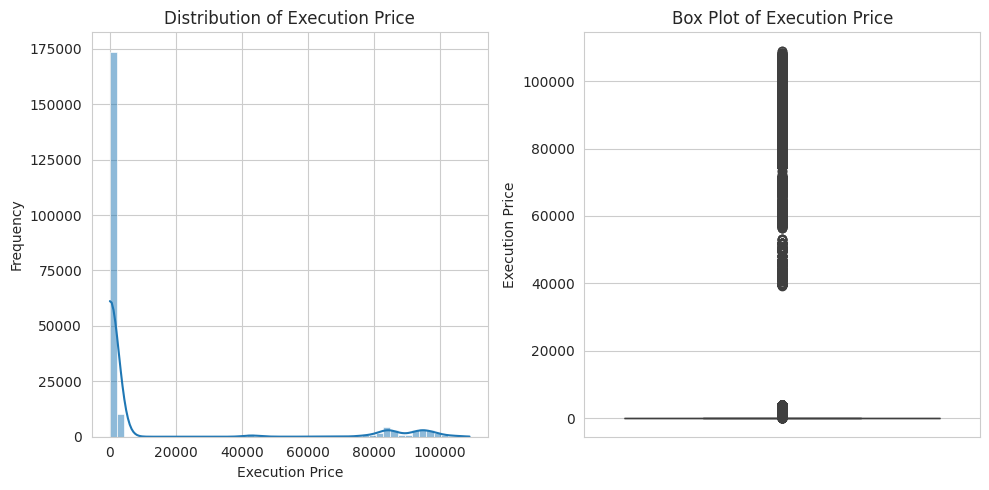

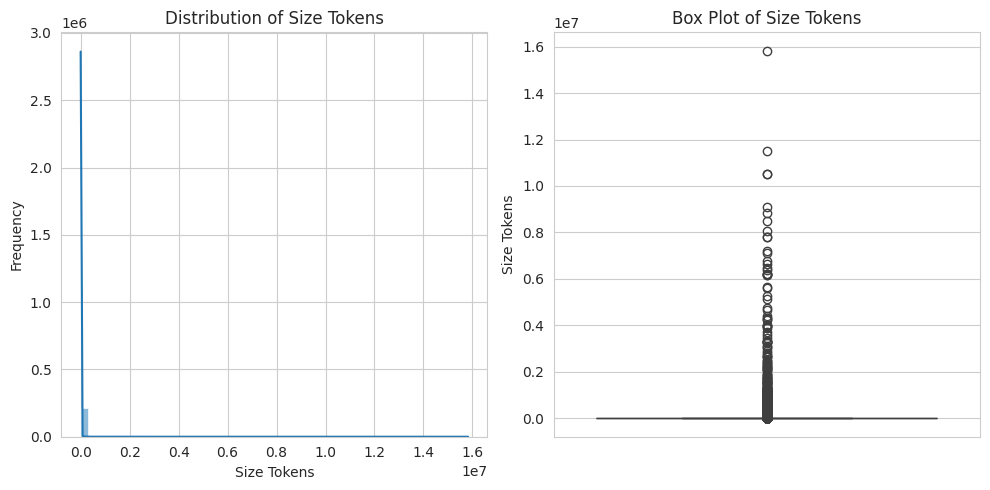

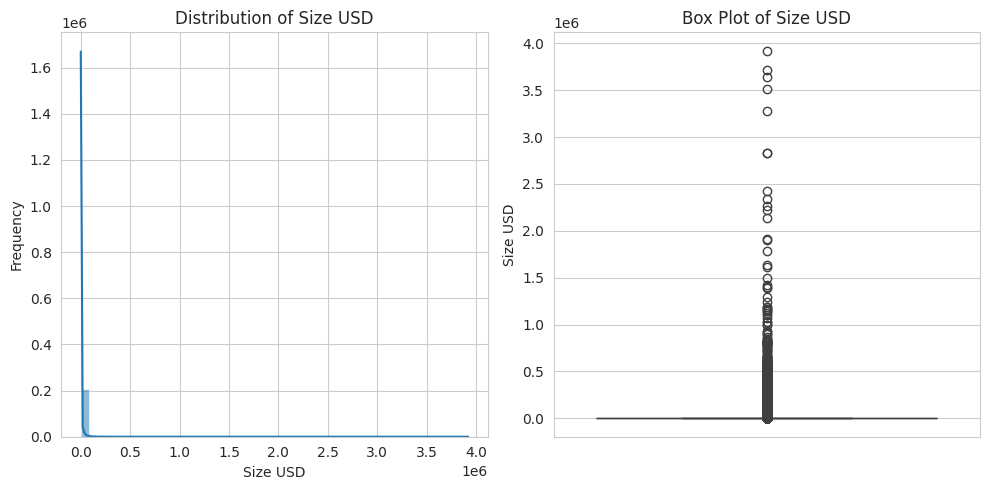

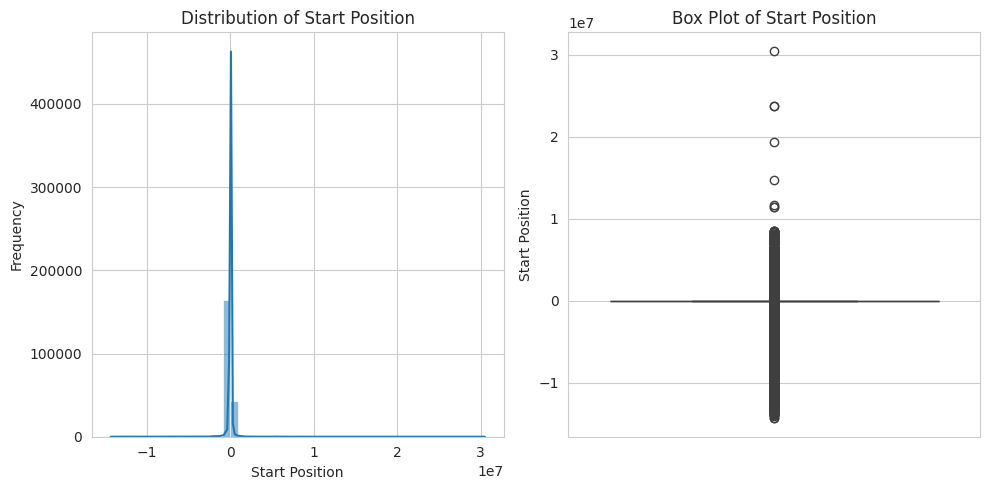

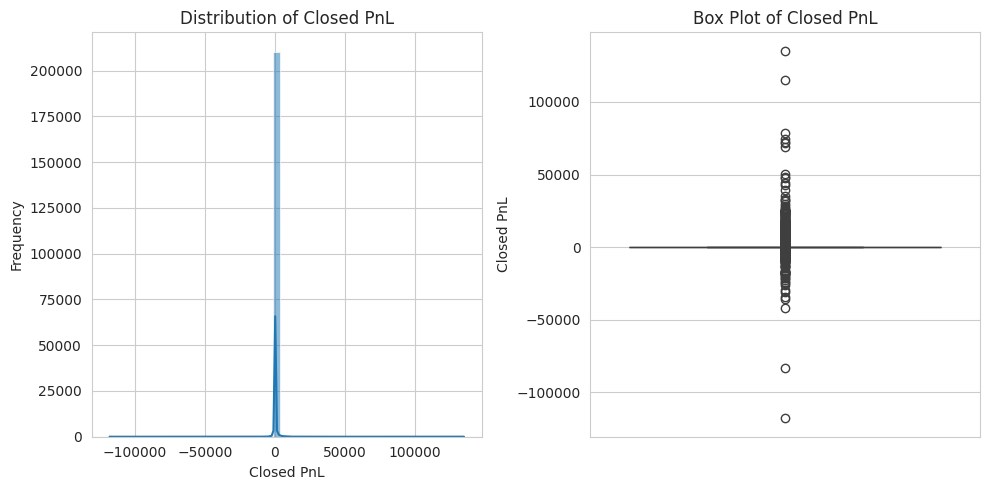

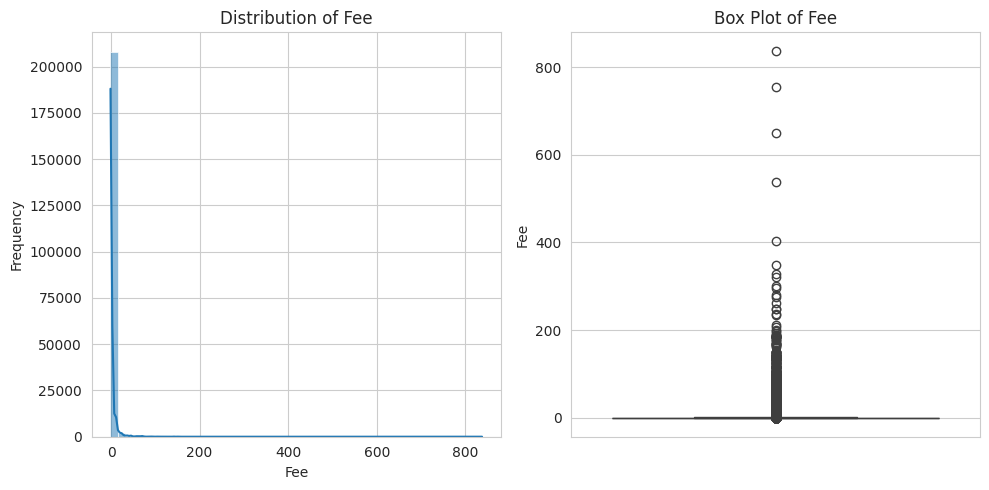

In [ ]:
# --- Univariate Analysis for Numerical Columns (df_historical_data example) ---
print("--- Univariate Analysis: Numerical Columns (df_historical_data) ---")

for col in trader_numerical_cols:
    if col in df_historical_data.columns:
        print(f"\n--- Analyzing Column: {col} ---")

        # 1. Descriptive Statistics
        print("Descriptive Statistics:")
        print(df_historical_data[col].describe()) # Includes count, mean, std, min, 25%, 50% (median), 75%, max

        # 2. Distribution Visualization (Histogram + KDE)
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        # Handle potential NaNs for plotting
        data_to_plot = df_historical_data[col].dropna()
        if not data_to_plot.empty:
            sns.histplot(data_to_plot, kde=True, bins=50) # Adjust bins as needed
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        else:
            plt.text(0.5, 0.5, 'No data to plot', ha='center', va='center')
            plt.title(f'Distribution of {col} (Empty)')

        # 3. Outlier Detection (Box Plot)
        plt.subplot(1, 2, 2)
        if not data_to_plot.empty:
             sns.boxplot(y=data_to_plot)
             plt.title(f'Box Plot of {col}')
             plt.ylabel(col)
        else:
             plt.text(0.5, 0.5, 'No data to plot', ha='center', va='center')
             plt.title(f'Box Plot of {col} (Empty)')

        plt.tight_layout()
    else:
        print(f"Warning: Column '{col}' not found in df_historical_data.")


**Execution Price:**
* The mean (11,415) is significantly higher than the median (1,828), and the standard deviation (29,448) is very large.
* The maximum value (109,004) is considerably more distant from the median than the minimum value (0.000005).
* **Conclusion:** The distribution is strongly right-skewed, implying that most trades occur at lower prices, with a few exceptionally high-priced trades elevating the average.

**Size (Tokens):**
* The mean (4,623) is substantially larger than the median (32), and the standard deviation (104,273) is exceptionally high.
* The maximum value (158 million) vastly exceeds the 75th percentile (1,879).
* **Conclusion:** This metric is strongly right-skewed, indicating that the majority of trades involve a small number of tokens, while a limited number of trades involve a very large volume.

**Size (USD):**
* The mean (5,639) is notably larger than the median (597), with a substantial standard deviation (36,575).
* The maximum value (39 million) is considerably greater than the 75th percentile (2,059).
* **Conclusion:** The distribution is strongly right-skewed, suggesting that most trades have a small USD value, with a few trades commanding very high USD values.

**Start Position:**
* The relationship between the mean (29,946) and median (847) is complex due to negative values.
* The massive standard deviation (673,807) relative to the median, coupled with extreme minimum (-143 million) and maximum (305 million) values, signifies a significant spread.
* **Conclusion:** This parameter exhibits a highly variable distribution, heavily influenced by outliers and extremes. It is not characterized by a classic skew but rather by pronounced tails.

**Closed PnL (Profit and Loss):**
* The mean (4,875) is positive while the median is 0.00, and the standard deviation (91,900) is very large.
* Both the maximum (135,329) and minimum (-117,990) values are quite distant from the median.
* **Conclusion:** The distribution is symmetrically heavy-tailed or potentially slightly right-skewed. The median of zero suggests many trades are near breakeven, but there are trades with very large profits and losses. The slightly positive mean indicates that large winning trades might be marginally more frequent or larger on average than large losing trades.

**Fee:**
* The mean (1.16) is significantly higher than the median (0.09), and the standard deviation (6.76) is large.
* The maximum value (837) is considerably larger than the 75th percentile (0.39).
* **Conclusion:** This metric is strongly right-skewed, indicating that most fees are small, but a few trades incur much higher fees, likely corresponding to the largest trades.

In [ ]:
skew_ep = df_historical_data['Execution Price'].skew()
print(skew_ep)     # ≈ 2.9  (heavy right tail)

2.2994160295346795


For achieving the best possible approximation of normality (critical for some statistical models), especially when standard log transformation isn't quite enough: Box-Cox Transformation.

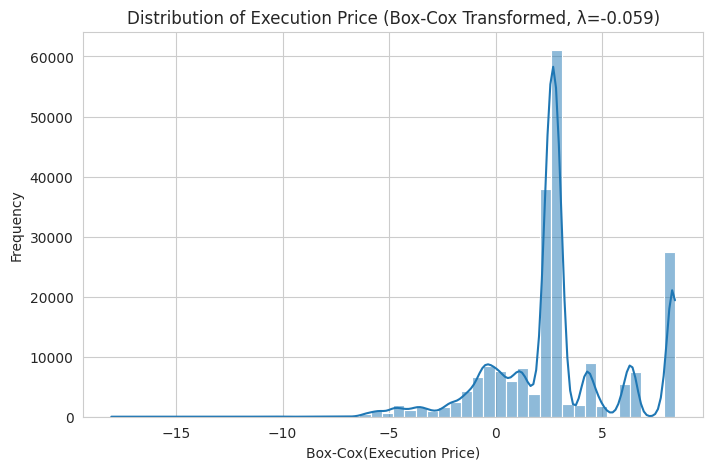

count    211224.000000
mean          2.847946
std           2.999306
min         -18.040883
25%           1.508920
50%           2.671569
75%           4.047356
max           8.413528
Name: Execution_Price_boxcox, dtype: float64
Fitted Lambda: -0.05868002737346582


In [ ]:
from scipy import stats

# Example for 'Execution Price'
# Filter for positive values
positive_mask_ep = df_historical_data['Execution Price'] > 0
data_to_transform = df_historical_data.loc[positive_mask_ep, 'Execution Price']

# Apply Box-Cox transformation
# Note: Box-Cox returns the transformed data and the lambda parameter used
transformed_data, fitted_lambda = stats.boxcox(data_to_transform)

# Add the transformed column back to the DataFrame (aligning indices)
df_historical_data.loc[positive_mask_ep, 'Execution_Price_boxcox'] = transformed_data
# Handle non-positive values if necessary (e.g., set to NaN or drop)
df_historical_data.loc[~positive_mask_ep, 'Execution_Price_boxcox'] = np.nan

plt.figure(figsize=(8, 5))
sns.histplot(df_historical_data['Execution_Price_boxcox'].dropna(), kde=True, bins=50)
plt.title(f'Distribution of Execution Price (Box-Cox Transformed, λ={fitted_lambda:.3f})')
plt.xlabel('Box-Cox(Execution Price)')
plt.ylabel('Frequency')
plt.show()

print(df_historical_data['Execution_Price_boxcox'].describe())
print(f"Fitted Lambda: {fitted_lambda}")

In [ ]:
skew_susd = df_historical_data['Size USD'].skew()           # ≈ 80
print(skew_susd)

43.77744808435803


Apply Log10 Transformation: calculates the base-10 logarithm of the 'Size USD' values for the positive entries and stores the result in a new column called 'Size_USD_log'. Log transformations are effective in reducing the impact of large values and making skewed distributions more symmetrical (closer to normal).

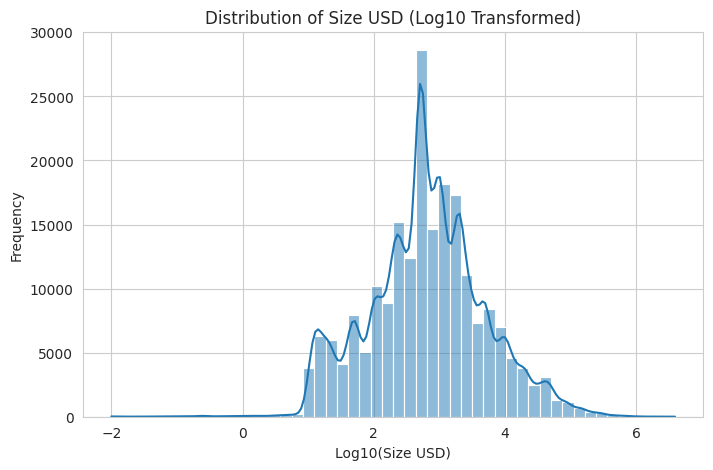

count    211181.000000
mean          2.803073
std           0.886852
min          -2.000000
25%           2.287376
50%           2.776120
75%           3.313777
max           6.593445
Name: Size_USD_log, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

positive_mask = df_historical_data['Size USD'] > 0
df_historical_data_temp = df_historical_data[positive_mask].copy()
df_historical_data_temp['Size_USD_log'] = np.log10(df_historical_data_temp['Size USD'])

# Plot the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_historical_data_temp['Size_USD_log'], kde=True, bins=50)
plt.title('Distribution of Size USD (Log10 Transformed)')
plt.xlabel('Log10(Size USD)')
plt.ylabel('Frequency')
plt.show()

# Check new statistics
print(df_historical_data_temp['Size_USD_log'].describe())

In [ ]:
df_historical_data['Size_USD_log'] = df_historical_data_temp['Size_USD_log']

In [ ]:
skew_sp = df_historical_data['Start Position'].skew()       # ≈ 6.3
print(skew_ep)

2.2994160295346795


transforming the 'Start Position' column, which can have both positive and negative values, using the Yeo-Johnson transformation

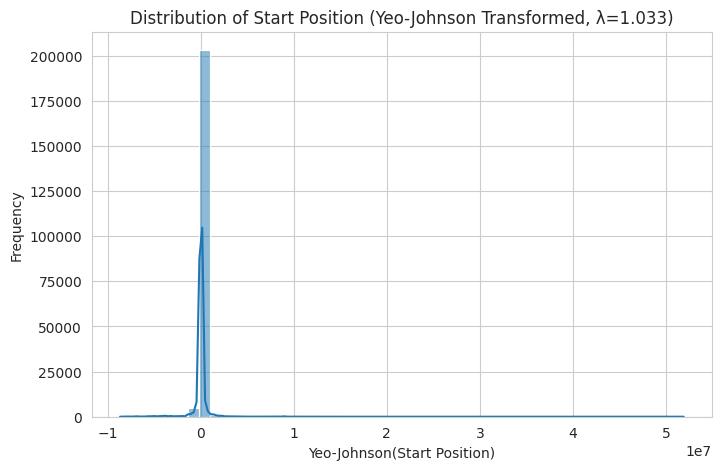

count    2.112240e+05
mean     1.266003e+04
std      5.835195e+05
min     -8.649833e+06
25%     -3.202239e+02
50%      9.504175e+01
75%      1.218939e+04
max      5.187940e+07
Name: Start_Position_yeojohnson, dtype: float64
Fitted Lambda: 1.032670731638239


In [ ]:
from scipy import stats

# Example for 'Start Position' (which can be negative)
data_to_transform_sp = df_historical_data['Start Position']

# Apply Yeo-Johnson transformation
transformed_data_sp, fitted_lambda_sp = stats.yeojohnson(data_to_transform_sp)

# Add the transformed column
df_historical_data['Start_Position_yeojohnson'] = transformed_data_sp

plt.figure(figsize=(8, 5))
sns.histplot(df_historical_data['Start_Position_yeojohnson'], kde=True, bins=50)
plt.title(f'Distribution of Start Position (Yeo-Johnson Transformed, λ={fitted_lambda_sp:.3f})')
plt.xlabel('Yeo-Johnson(Start Position)')
plt.ylabel('Frequency')
plt.show()

print(df_historical_data['Start_Position_yeojohnson'].describe())
print(f"Fitted Lambda: {fitted_lambda_sp}")

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


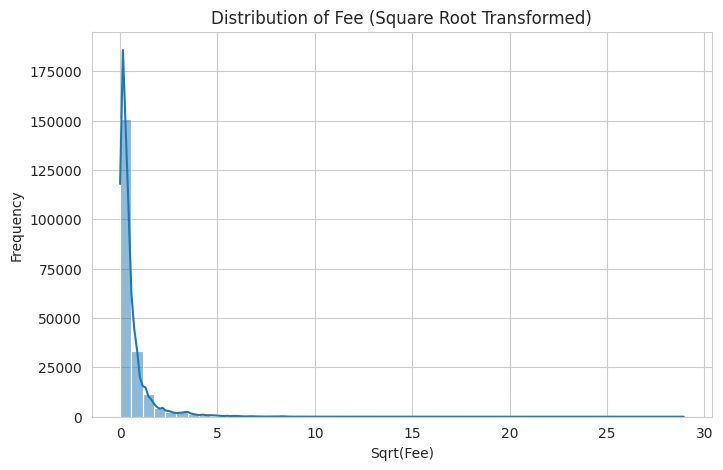

count    208748.000000
mean          0.581196
std           0.917156
min           0.000000
25%           0.132004
50%           0.304884
75%           0.637180
max          28.939101
Name: Fee_sqrt, dtype: float64


In [ ]:
# Example for 'Fee'
df_historical_data['Fee_sqrt'] = np.sqrt(df_historical_data['Fee'])

plt.figure(figsize=(8, 5))
sns.histplot(df_historical_data['Fee_sqrt'], kde=True, bins=50)
plt.title('Distribution of Fee (Square Root Transformed)')
plt.xlabel('Sqrt(Fee)')
plt.ylabel('Frequency')
plt.show()

print(df_historical_data['Fee_sqrt'].describe())

--- Fixing Skewness for 'Size Tokens' ---
Number of non-positive values in 'Size Tokens': 0


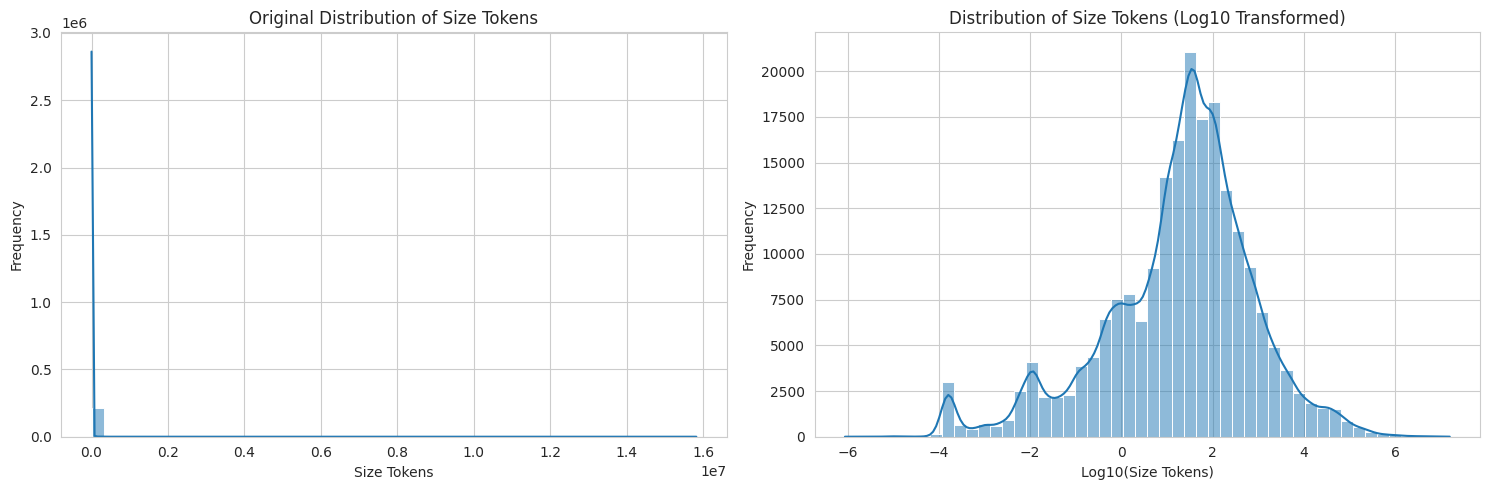


Descriptive Statistics for Log10(Size Tokens):
count    211224.000000
mean          1.270266
std           1.651024
min          -6.058489
25%           0.468347
50%           1.505150
75%           2.273933
max           7.199273
Name: Size_Tokens_log10, dtype: float64


In [ ]:
# --- Fixing Skewness for 'Size Tokens' ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Fixing Skewness for 'Size Tokens' ---")

# 1. Check for non-positive values (important for log transform)
non_positive_count = (df_historical_data['Size Tokens'] <= 0).sum()
print(f"Number of non-positive values in 'Size Tokens': {non_positive_count}")

# 2. Apply Log10 Transformation (filtering out non-positive values just in case)
# Create a mask for positive values
positive_mask_st = df_historical_data['Size Tokens'] > 0

df_historical_data['Size_Tokens_log10'] = np.nan # Initialize column with NaN
df_historical_data.loc[positive_mask_st, 'Size_Tokens_log10'] = np.log10(df_historical_data.loc[positive_mask_st, 'Size Tokens'])

# 3. Visualize the Original and Transformed Distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original Distribution
sns.histplot(df_historical_data['Size Tokens'].dropna(), kde=True, bins=50, ax=axes[0])
axes[0].set_title('Original Distribution of Size Tokens')
axes[0].set_xlabel('Size Tokens')
axes[0].set_ylabel('Frequency')

# Transformed Distribution
sns.histplot(df_historical_data['Size_Tokens_log10'].dropna(), kde=True, bins=50, ax=axes[1])
axes[1].set_title('Distribution of Size Tokens (Log10 Transformed)')
axes[1].set_xlabel('Log10(Size Tokens)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Check New Statistics for the Transformed Column
print("\nDescriptive Statistics for Log10(Size Tokens):")
print(df_historical_data['Size_Tokens_log10'].describe())



--- Fixing Skewness for 'Closed PnL' ---


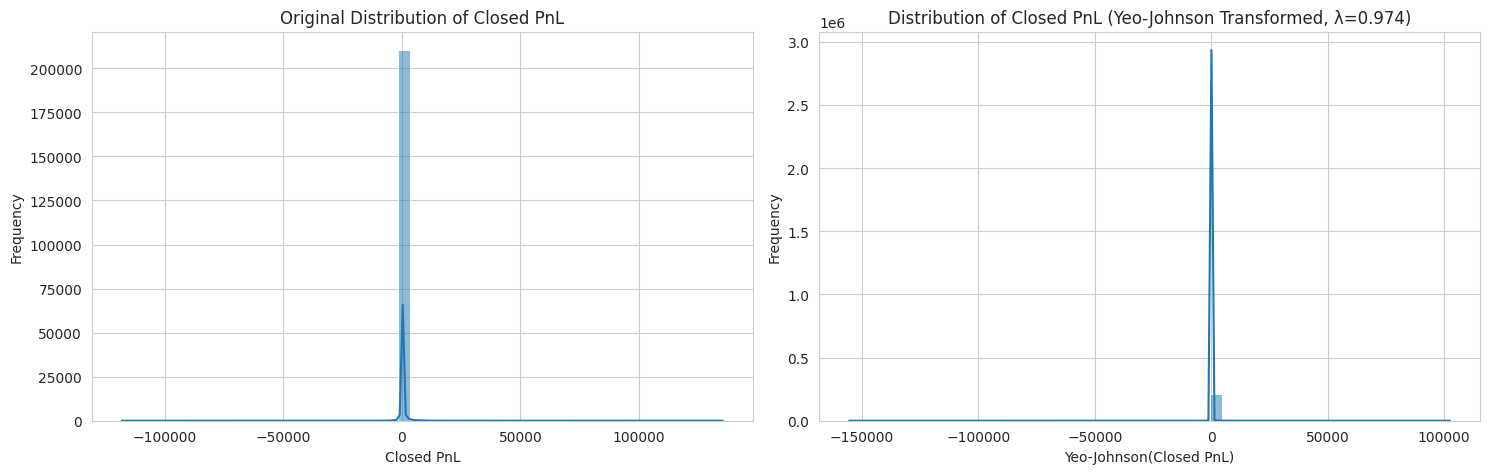


Descriptive Statistics for Yeo-Johnson(Closed PnL):
count    211224.000000
mean         36.326047
std         848.755165
min     -155402.549531
25%           0.000000
50%           0.000000
75%           5.610202
max      102454.908728
Name: Closed_PnL_yeojohnson, dtype: float64
Fitted Lambda for Yeo-Johnson transformation: 0.9742


In [ ]:
# --- Fixing Skewness for 'Closed PnL' ---
from scipy import stats # Required for yeojohnson

print("\n--- Fixing Skewness for 'Closed PnL' ---")

# 1. Apply Yeo-Johnson Transformation (handles negatives/zero automatically)
# yeojohnson returns the transformed data and the lambda parameter
transformed_pnl_data, fitted_lambda_pnl = stats.yeojohnson(df_historical_data['Closed PnL'])

# Create a new column for the transformed data
df_historical_data['Closed_PnL_yeojohnson'] = transformed_pnl_data

# 2. Visualize the Original and Transformed Distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original Distribution
sns.histplot(df_historical_data['Closed PnL'].dropna(), kde=True, bins=50, ax=axes[0])
axes[0].set_title('Original Distribution of Closed PnL')
axes[0].set_xlabel('Closed PnL')
axes[0].set_ylabel('Frequency')

# Transformed Distribution
sns.histplot(df_historical_data['Closed_PnL_yeojohnson'].dropna(), kde=True, bins=50, ax=axes[1])
axes[1].set_title(f'Distribution of Closed PnL (Yeo-Johnson Transformed, λ={fitted_lambda_pnl:.3f})')
axes[1].set_xlabel('Yeo-Johnson(Closed PnL)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Check New Statistics for the Transformed Column
print("\nDescriptive Statistics for Yeo-Johnson(Closed PnL):")
print(df_historical_data['Closed_PnL_yeojohnson'].describe())
print(f"Fitted Lambda for Yeo-Johnson transformation: {fitted_lambda_pnl:.4f}")


In [ ]:
df_historical_data.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Expected_Fee,Fee_Discrepancy,Discrepancy_Percent,timestampfix,Execution_Price_boxcox,Size_USD_log,Start_Position_yeojohnson,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.755256,2.409852,87.463797,2024-10-27 03:33:20,1.955020,3.896094,0.000000,0.587711,2.99426,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.044688,0.039088,87.468672,2024-10-27 03:33:20,1.955364,2.106123,1196.930422,0.074833,1.20412,0.0


 # perform univariate analysis
 on the categorical columns (Account, Coin, Side, Direction, Crossed)

--- Univariate Analysis: Categorical Columns (df_historical_data) ---

--- Analyzing Column: Account ---
Value Counts:
Account
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864    21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    15605
0x8477e447846c758f5a675856001ea72298fd9cb5    14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0xb899e522b5715391ae1d4f137653e7906c5e2115     4838
0x8170715b3b381dffb7062c0298972d4727a0a63b     4601
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x271b280974205ca63b716753467d5a371de622ab     3809
0x39cef799f8b69da1995852eea189df24eb5cae3

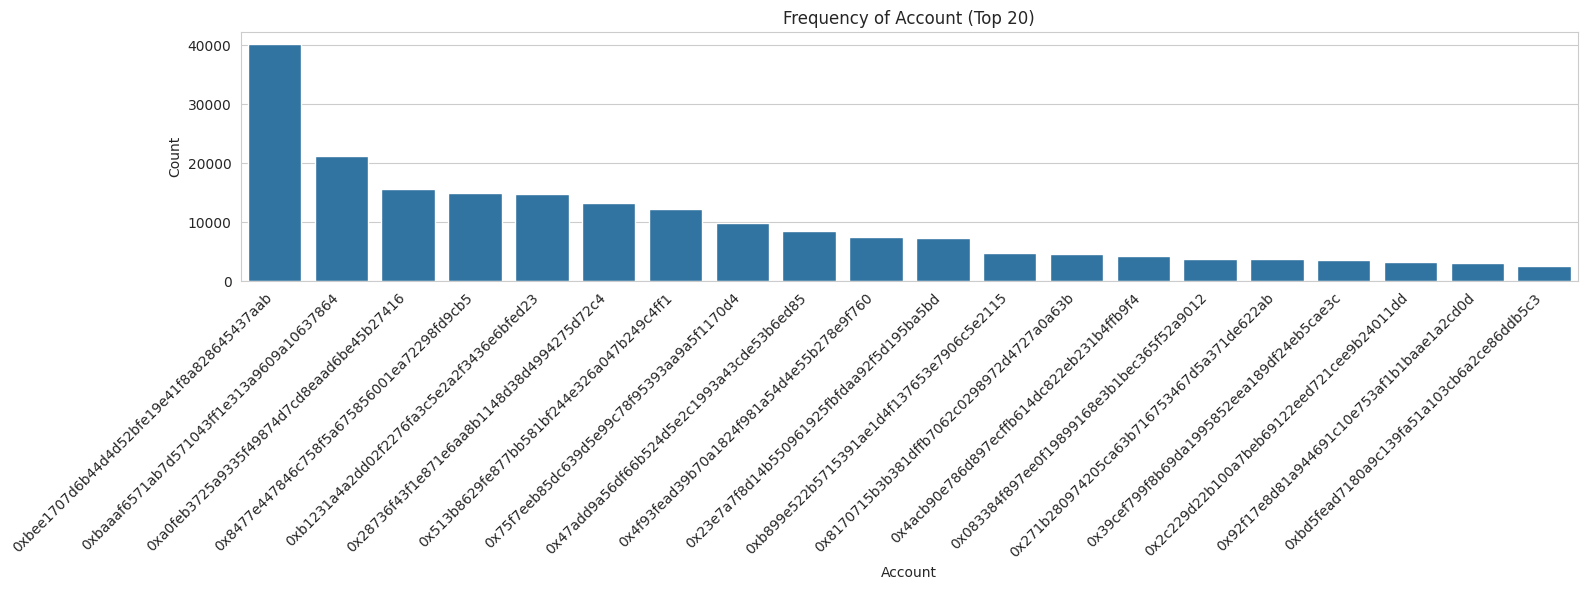


--- Analyzing Column: Coin ---
Value Counts:
Coin
HYPE        68005
TOKEN107    29992
BTC         26064
ETH         11158
SOL         10691
            ...  
TOKEN68         1
TOKEN6          1
TOKEN42         1
TOKEN45         1
TOKEN48         1
Name: count, Length: 246, dtype: int64

Percentage Breakdown (Top 10):
Coin
HYPE         32.195679
TOKEN107     14.199144
BTC          12.339507
ETH           5.282544
SOL           5.061451
FARTCOIN      2.201454
MELANIA       2.096353
PURR/USDC     1.313298
WLD           0.938814
SUI           0.936920
Name: count, dtype: float64


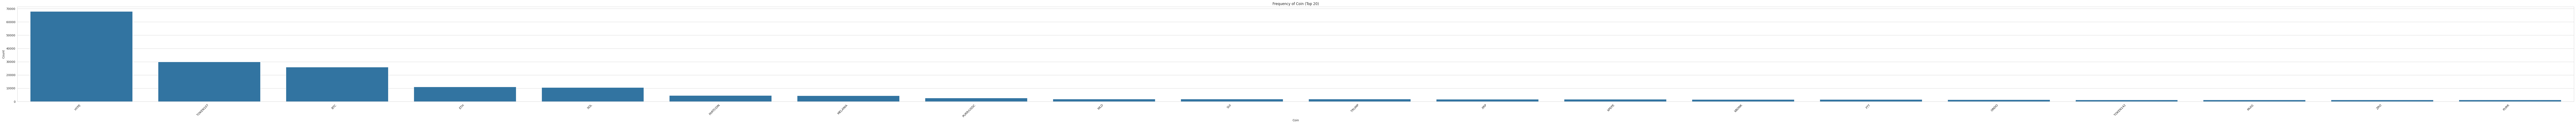


--- Analyzing Column: Side ---
Value Counts:
Side
SELL    108528
BUY     102696
Name: count, dtype: int64

Percentage Breakdown (Top 10):
Side
SELL    51.380525
BUY     48.619475
Name: count, dtype: float64


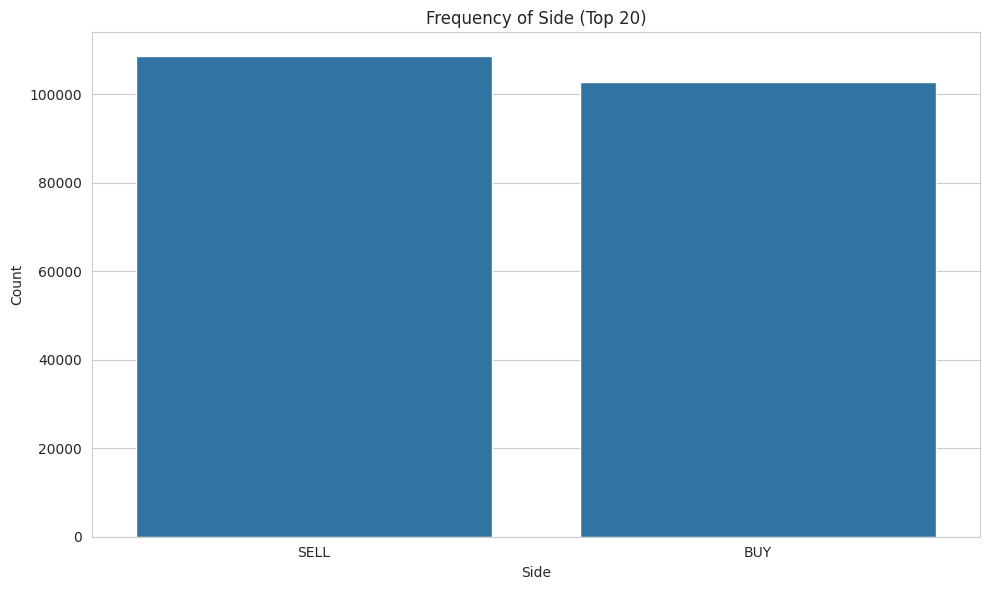


--- Analyzing Column: Direction ---
Value Counts:
Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

Percentage Breakdown (Top 10):
Direction
Open Long               23.621842
Close Long              23.045677
Open Short              18.814623
Close Short             17.049672
Sell                     9.422225
Buy                      7.913873
Spot Dust Conversion     0.067227
Short > Long             0.033140
Long > Short             0.026986
Auto-Deleveraging        0.003787
Name: count, dtype: float64


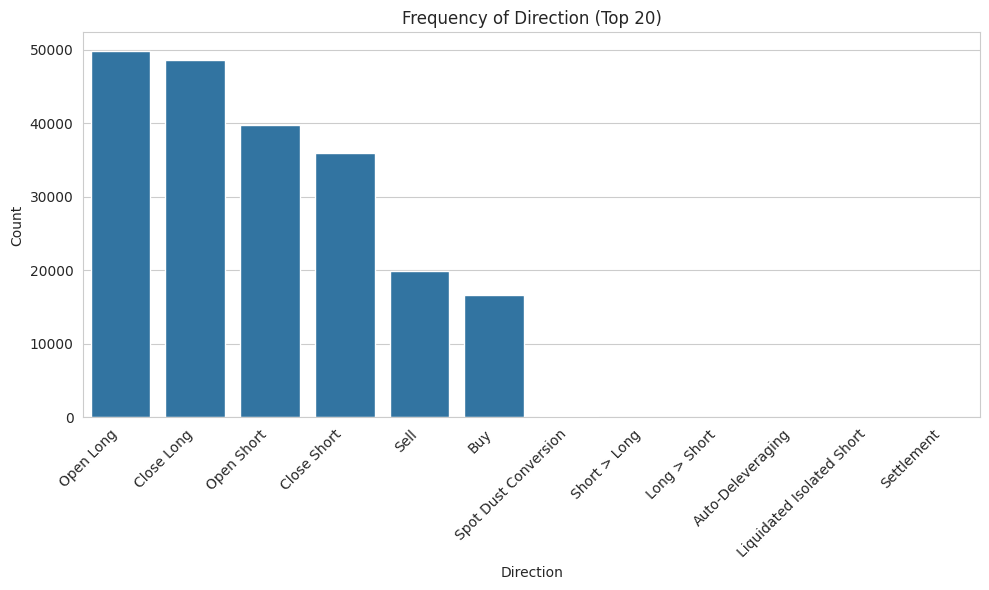


--- Analyzing Column: Crossed ---
Value Counts:
Crossed
True    211224
Name: count, dtype: int64

Percentage Breakdown (Top 10):
Crossed
True    100.0
Name: count, dtype: float64


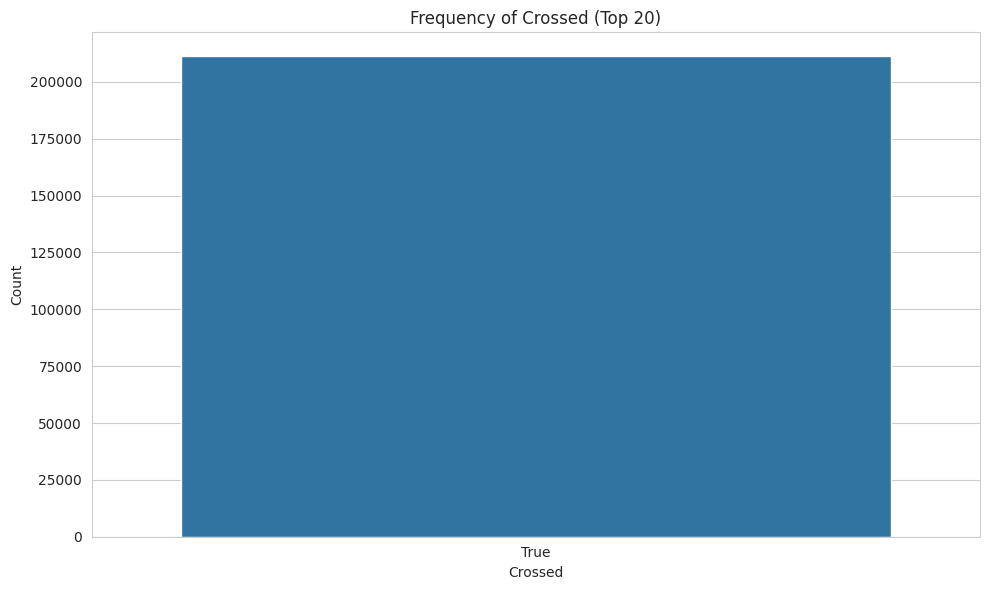


--- Completed Univariate Analysis for Categorical Columns ---


In [ ]:
# --- Univariate Analysis for Categorical Columns ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # To handle directory creation/checking

# Ensure the 'outputs' directory exists
os.makedirs('outputs', exist_ok=True)

print("--- Univariate Analysis: Categorical Columns (df_historical_data) ---")

# Define the categorical columns to analyze
categorical_columns = ['Account', 'Coin', 'Side', 'Direction', 'Crossed']

# Loop through each categorical column
for col in categorical_columns:
    if col in df_historical_data.columns:
        print(f"\n--- Analyzing Column: {col} ---")

        # 1. Value Counts
        value_counts = df_historical_data[col].value_counts()
        print("Value Counts:")
        print(value_counts)

        # Optional: Show percentage breakdown (useful for understanding distribution)
        print("\nPercentage Breakdown (Top 10):")
        print((value_counts / len(df_historical_data) * 100).head(10)) # Show top 10 percentages

        # 2. Frequency Visualization (Bar Chart)
        plt.figure(figsize=(max(10, len(value_counts) * 0.5), 6)) # Adjust width based on number of categories

        # Handle potential NaNs for plotting (dropna() is often default for value_counts, but good to be explicit if plotting separately)
        # For countplot, it's usually handled, but filtering the value_counts index is safer for order
        top_categories = value_counts.head(20).index # Show top 20 categories to avoid overly wide plots
        data_to_plot = df_historical_data[df_historical_data[col].isin(top_categories)][col]

        if not data_to_plot.empty:
            # Use the order from value_counts for consistent bar order (descending frequency)
            sns.countplot(x=data_to_plot, order=top_categories)
            plt.title(f'Frequency of {col} (Top 20)')
            plt.xlabel(col)
            plt.ylabel('Count')
            # Rotate x-axis labels if there are many categories
            if len(top_categories) > 5:
                plt.xticks(rotation=45, ha='right')
        else:
            plt.text(0.5, 0.5, 'No data available for plotting', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title(f'Frequency of {col} (Empty)')

        plt.tight_layout()


        # 4. Display the Plot in the notebook
        plt.show()


    else:
        print(f"\nWarning: Column '{col}' not found in df_historical_data. Skipping analysis for this column.")

print("\n--- Completed Univariate Analysis for Categorical Columns ---")




---

### 🧮 Trading Account Insights
- **Total Accounts**: 32 unique traders
- **High-Activity Accounts**: A few addresses like `0xbee...aab` and `0xbaa...864` perform **significantly more trades** than others  
- **💡 Implication**: Segmenting traders by activity level or analyzing behaviors of dominant accounts could reveal valuable patterns

---

### 🪙 Coin Distribution
- **Unique Coins**: 246 in total
- **Top Coins by Volume**: HYPE, TOKEN107, BTC, ETH, SOL
- **💡 Implication**: Focus on these key coins or coin clusters for behavioral and volume-based analysis

---

### 🔁 Trade Side Analysis
- **BUY vs SELL**: Fairly balanced, with a **slight tilt toward SELL**
- **💡 Implication**: No dominant direction bias — dataset supports comparative studies between buying and selling behavior

---

### 📊 Trade Direction Analysis
- **Common Directions**:
  - Derivatives: `Open Long`, `Close Long`, `Open Short`, `Close Short`
  - Spot: `Buy`, `Sell`
  - Others: `Spot Dust Conversion`, `Short > Long`, etc.
- **💡 Implication**: Trade types align with typical derivative strategies; infrequent directions may flag unique strategy use or platform-specific features

---

### 🔄 Crossed Column Insight
- **Uniform Value**: All entries are `'True'`
- **💡 Implication**: Trades were likely matched via an order book; needs clarification from platform docs for precise interpretation

---

Let me know if you want this transformed into a visual dashboard layout or need help formulating next steps for hypothesis testing 📈.

# multivariate analysis to understand relationships using scatter plots or correlation matrices

### Multivariate Analysis: Numerical Columns

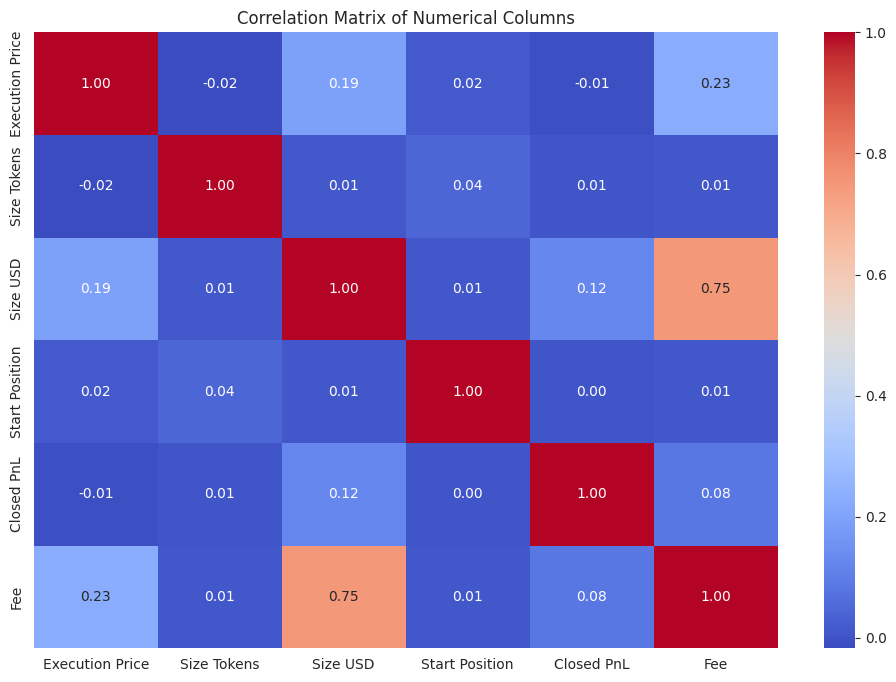

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only the numerical columns for the correlation matrix
numerical_df_historical_data = df_historical_data[trader_numerical_cols]
correlation_matrix = numerical_df_historical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### Scatter Plots for Key Relationships
Based on the correlation matrix and potential interesting relationships, let's create some scatter plots.

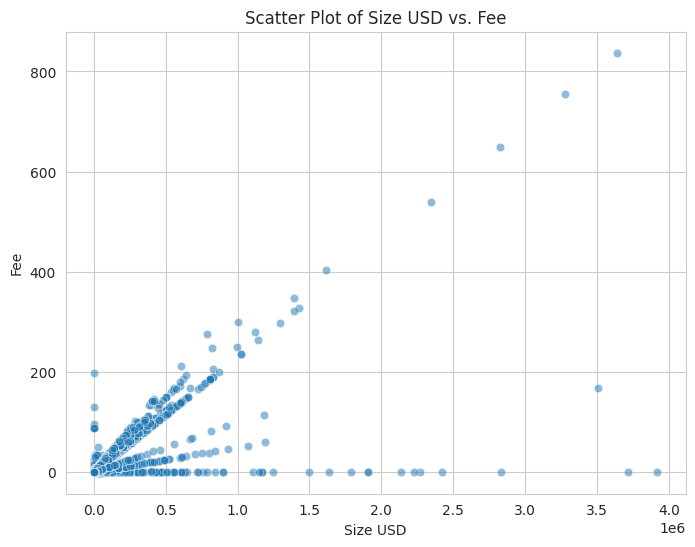

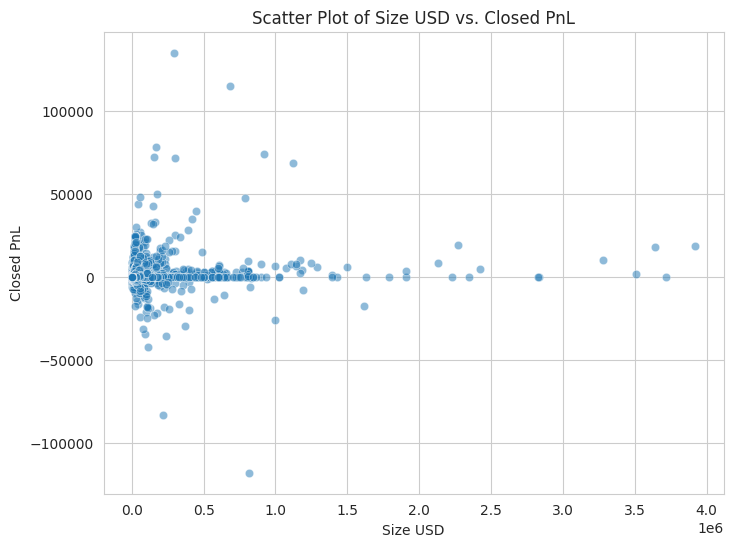

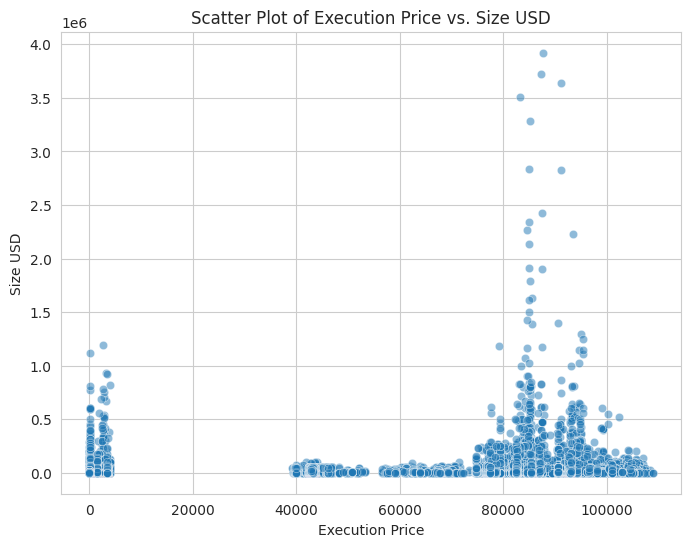

In [ ]:
# Example Scatter Plot: Size USD vs. Fee
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Size USD', y='Fee', alpha=0.5)
plt.title('Scatter Plot of Size USD vs. Fee')
plt.xlabel('Size USD')
plt.ylabel('Fee')
plt.show()

# Example Scatter Plot: Size USD vs. Closed PnL
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Size USD', y='Closed PnL', alpha=0.5)
plt.title('Scatter Plot of Size USD vs. Closed PnL')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.show()

# Example Scatter Plot: Execution Price vs. Size USD
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Execution Price', y='Size USD', alpha=0.5)
plt.title('Scatter Plot of Execution Price vs. Size USD')
plt.xlabel('Execution Price')
plt.ylabel('Size USD')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Multivariate Analysis: Numerical Columns

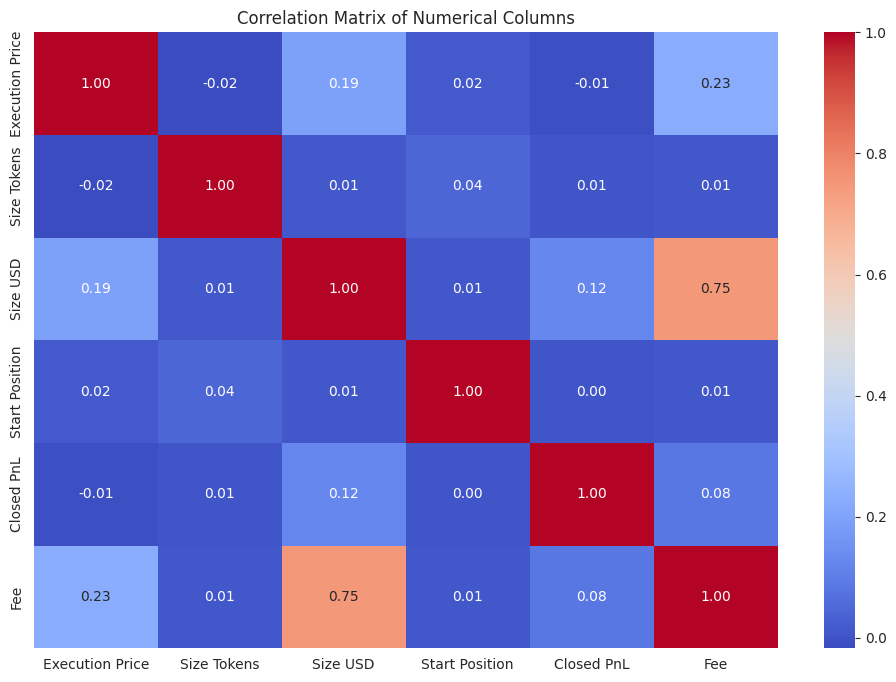

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only the numerical columns for the correlation matrix
numerical_df_historical_data = df_historical_data[trader_numerical_cols]
correlation_matrix = numerical_df_historical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### Scatter Plots for Key Relationships
Based on the correlation matrix and potential interesting relationships, let's create some scatter plots.

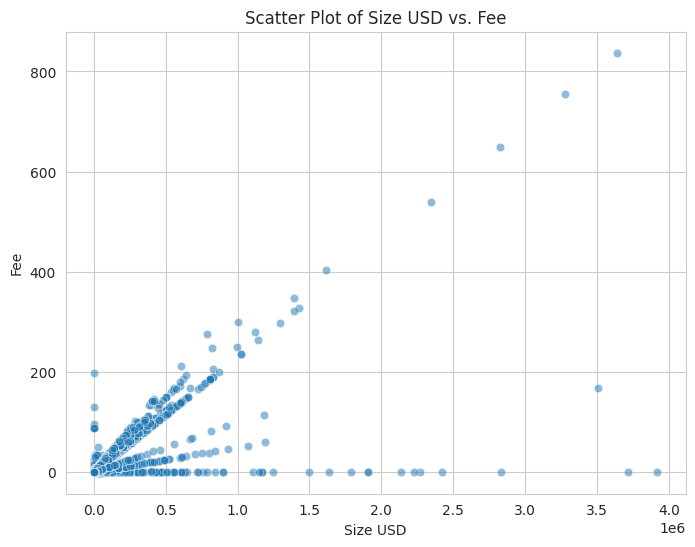

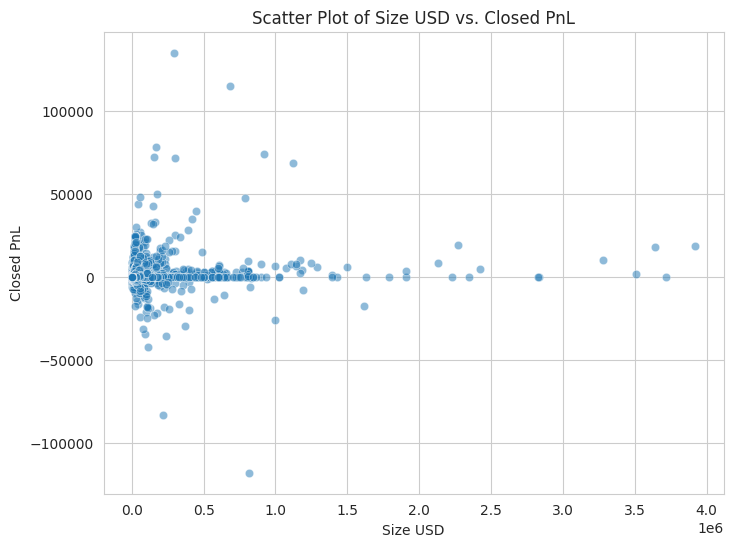

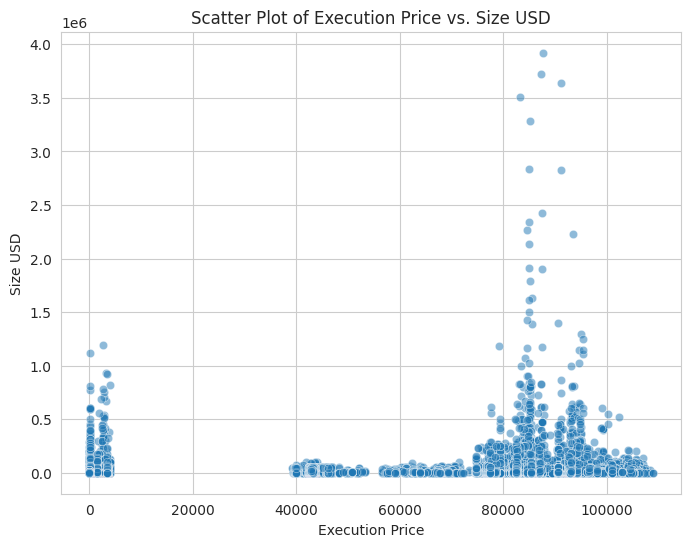

In [ ]:
# Example Scatter Plot: Size USD vs. Fee
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Size USD', y='Fee', alpha=0.5)
plt.title('Scatter Plot of Size USD vs. Fee')
plt.xlabel('Size USD')
plt.ylabel('Fee')
plt.show()

# Example Scatter Plot: Size USD vs. Closed PnL
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Size USD', y='Closed PnL', alpha=0.5)
plt.title('Scatter Plot of Size USD vs. Closed PnL')
plt.xlabel('Size USD')
plt.ylabel('Closed PnL')
plt.show()

# Example Scatter Plot: Execution Price vs. Size USD
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_historical_data, x='Execution Price', y='Size USD', alpha=0.5)
plt.title('Scatter Plot of Execution Price vs. Size USD')
plt.xlabel('Execution Price')
plt.ylabel('Size USD')
plt.show()

Operations Performed
🧮 Correlation Matrix
Generated for numerical columns: Execution Price, Size Tokens, Size USD, Start Position, Closed PnL, Fee

Used df.corr() for pairwise correlations

Visualized using seaborn.heatmap() with:

annot=True → displays exact correlation values

cmap='coolwarm' → warmer colors = strong positive, cooler = negative correlation

📊 Scatter Plots
Relationships visualized using seaborn.scatterplot() with alpha=0.5 for transparency

Size USD vs Fee

Size USD vs Closed PnL

Execution Price vs Size USD



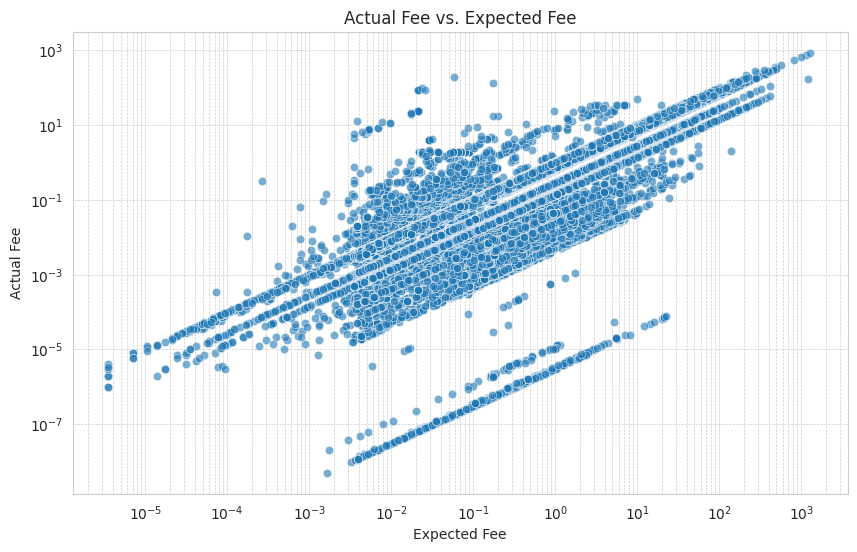

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_historical_data, x='Expected_Fee', y='Fee', alpha=0.6)
plt.title('Actual Fee vs. Expected Fee')
plt.xlabel('Expected Fee')
plt.ylabel('Actual Fee')
plt.xscale('log') # Use log scale if values span a wide range
plt.yscale('log') # Use log scale if values span a wide range
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()